In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BAC.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

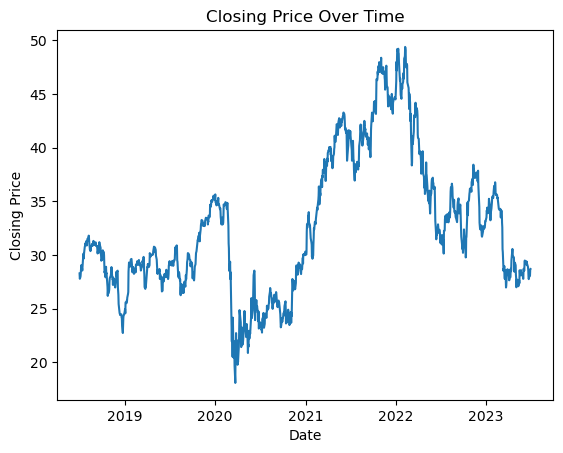

In [3]:
# plt.plot(df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df['Close'])

In [4]:

#df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df=df[['Close']]

In [5]:
df.head()

,Close
Date,
2018-07-02,28.280001
2018-07-03,27.780001
2018-07-05,27.920000
2018-07-06,28.030001
2018-07-09,29.049999


In [6]:
from statsmodels.tsa.stattools import adfuller

def stationaryTest(data):
    test=adfuller(data,autolag='AIC')
    print('1. ADF: ',test[0])
    print('2. P-value: ',test[1])
    print('3. Num of Lags: ',test[2])
    print('4. Num of observations used: ',test[3])
    print('5. Critical Values: ')
    for key,val in test[4].items():
        print('\t',key,':',val)

In [7]:
stationaryTest(df)

1. ADF:  -1.9867750698962112
2. P-value:  0.2924017050677038
3. Num of Lags:  9
4. Num of observations used:  1248
5. Critical Values: 
	 1% : -3.4356006420838963
	 5% : -2.8638586845641063
	 10% : -2.5680044958343604


In [8]:
#n=int(len(df)*0.8)
#y=df.Close[:n]
#y_test=df.Close[n:]

In [47]:
from sklearn.model_selection import train_test_split
#feature=df.index
target=df[['Close']]
X,X_test=train_test_split(target,test_size=0.2,random_state=42)

In [48]:
X

,Close
Date,
2023-04-10,27.940001
2019-04-17,30.030001
2022-12-16,31.700001
2023-02-07,36.770000
2020-01-07,34.619999
...,...
2022-08-24,34.520000
2022-11-04,36.790001
2022-12-27,32.529999


In [11]:
y

,Close
Date,
2023-04-10,27.940001
2019-04-17,30.030001
2022-12-16,31.700001
2023-02-07,36.770000
2020-01-07,34.619999
...,...
2022-08-24,34.520000
2022-11-04,36.790001
2022-12-27,32.529999


In [49]:
indf=X.diff()#.to_frame()

In [50]:
X_test

,Close
Date,
2020-09-23,23.260000
2018-11-23,26.969999
2018-09-13,30.139999
2018-10-01,29.650000
2022-10-05,31.920000
...,...
2019-02-14,28.389999
2020-09-04,26.540001
2020-01-31,32.830002


In [51]:
indf

,Close
Date,
2023-04-10,NaN
2019-04-17,2.090000
2022-12-16,1.670000
2023-02-07,5.069999
2020-01-07,-2.150001
...,...
2022-08-24,11.790000
2022-11-04,2.270001
2022-12-27,-4.260002


In [52]:
indf.dropna(inplace=True)

In [53]:
indf

,Close
Date,
2019-04-17,2.090000
2022-12-16,1.670000
2023-02-07,5.069999
2020-01-07,-2.150001
2019-10-25,-2.900000
...,...
2022-08-24,11.790000
2022-11-04,2.270001
2022-12-27,-4.260002


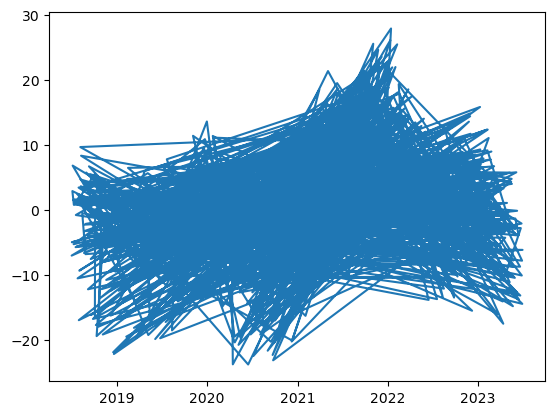

In [54]:
plt.plot(indf)

In [55]:
stationaryTest(indf)

1. ADF:  -13.347303366519
2. P-value:  5.760598473853459e-25
3. Num of Lags:  17
4. Num of observations used:  987
5. Critical Values: 
	 1% : -3.4369927443074353
	 5% : -2.864472756705845
	 10% : -2.568331546097238


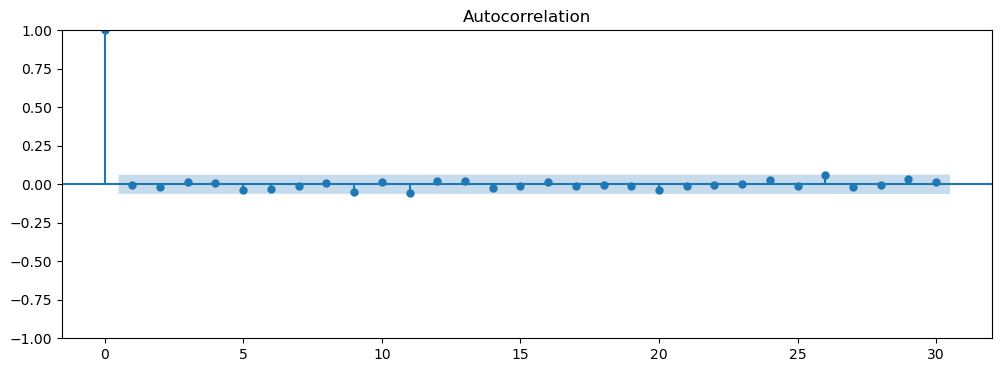

C:\Users\dvard\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


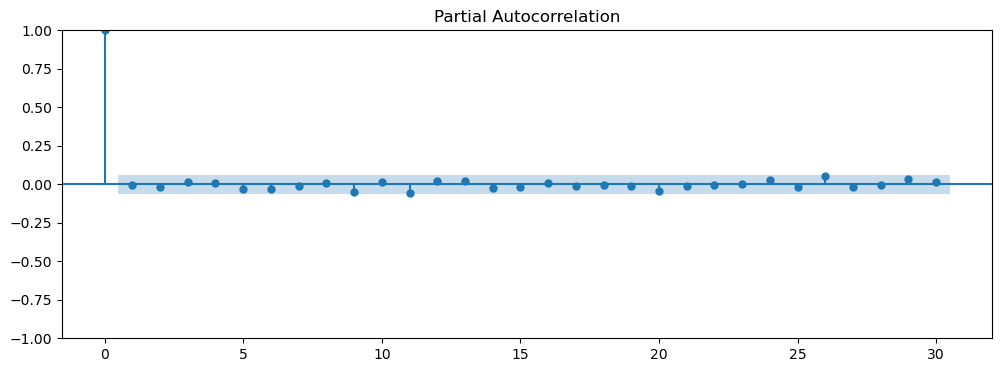

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

time=pd.Series(indf.index)
#plot acf
plt.figure(figsize=(12, 4))
plot_acf(time, lags=30, ax=plt.gca())
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(time,lags=30, ax=plt.gca())
plt.show()


In [57]:
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima.arima import auto_arima
#!pip install pmdarima
#import warnings 
#warnings.filterwarnings('ignore')
#import pmdarima as pmd
#import auto_arima


In [58]:
# Fit the ARIMA model
model = ARIMA(indf,order=(5,1,5))
model_fit = model.fit()

C:\Users\dvard\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dvard\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dvard\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dvard\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dvard\anaconda3\Lib\site-

In [59]:
# Forecast the next 10 days
forecast_result = model_fit.predict(X_test)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [44]:
# Extract the forecasted differences
forecast_differences = forecast_result.predicted_mean
forecast_differences

AttributeError: 'Series' object has no attribute 'predicted_mean'

In [28]:
last_price = y.iloc[-1].Close


 # Invert the differencing
forecast_prices = forecast_differences.cumsum() + last_price

# Initialize a series with the same index as the forecast, filled with the last known closing price
#forecast_prices = pd.Series(last_price, index=forecast_differences.index)

# Add the cumulative sum of forecasted differences to get the forecasted prices
#forecast_prices = forecast_prices.add(forecast_differences.cumsum(), fill_value=0)

In [29]:
forecast_prices

1005    32.371197
1006    32.418479
1007    33.027243
1008    32.784185
1009    32.185948
          ...    
1252    33.363374
1253    32.141278
1254    32.816576
1255    32.940412
1256    32.116611
Name: predicted_mean, Length: 252, dtype: float64

In [30]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,forecast_prices)
print('MSE:',mse)

MSE: 40.29402846300351


In [31]:
r2=metrics.r2_score(y_test,forecast_prices)
print('R2 Score:',r2)

R2 Score: -0.011234976904118676
